<a href="https://colab.research.google.com/github/rebeccalizaverghese/IBM-Data-Science/blob/main/9.2_Python_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Classification**
**Classification** – It is a supervised learning approach which can be thought of as a means of categorizing or classifying some unknown items into a discrete set of class. Classification attempts to learn the relationship between a set of feature variables and a target variable of interest. The target attribute in classification is a categorical variable with discrete values.

#### **K-Nearest Neighbor**
**K-Nearest Neighbor algorithm** is a classification algorithm that takes a bunch of labeled points and uses them to learn how to label other points. This algorithm classifies cases based on their similarity to other cases. In KNN, data points that are near to each other are said to be neighbors. It is based on the paradigm where similar cases with same class labels are near each other. Thus, the distance between 2 cases is a measure of their dissimilarity

In [1]:
# Install libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


**Data Visualization and Analysis**

In [ ]:
# To see how many of each class is in our data set
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


array([[<Axes: title={'center': 'income'}>]], dtype=object)

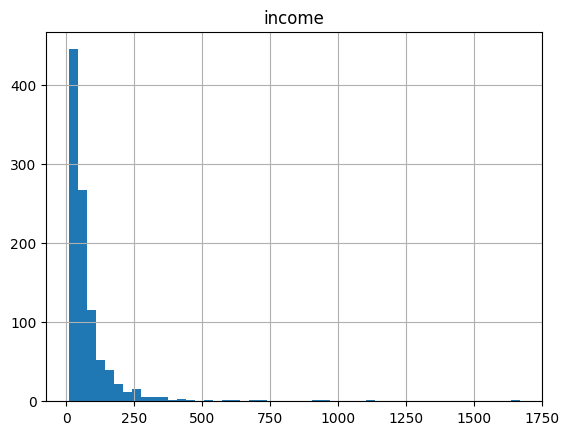

In [ ]:
df.hist(column='income', bins=50)

In [ ]:
# define feature sets, x
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [ ]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside', 'custcat']].astype(float).values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.,
          1.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.,
          4.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.,
          3.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.,
          1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.,
          3.]])

In [ ]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [ ]:
# Normalize data
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004,  0.45813963],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794, -1.32797979],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577,  0.45813963]])

In [ ]:
# Train/Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 12) (800,)
Test set: (200, 12) (200,)


**Classification - KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Training algorithm with k=4
k=4
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# predicting
yhat = neigh.predict(x_test)
yhat[0:5]

array([3, 1, 1, 2, 4])

In [ ]:
# Accuracy Evaluation
from sklearn import metrics
print('Train set Accuracy: ', metrics.accuracy_score(y_train, neigh.predict(x_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat ))

Train set Accuracy:  0.82875
Test set Accuracy:  0.735


**Practice**
build the model again, but this time with k=6

In [ ]:
k=6
neig = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
neig
yhat6 = neig.predict(x_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neig.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.8125
Test set Accuracy:  0.755


In [ ]:
# calculate the accuracy of KNN for different values of k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.76 , 0.68 , 0.725, 0.735, 0.73 , 0.755, 0.775, 0.77 , 0.765])

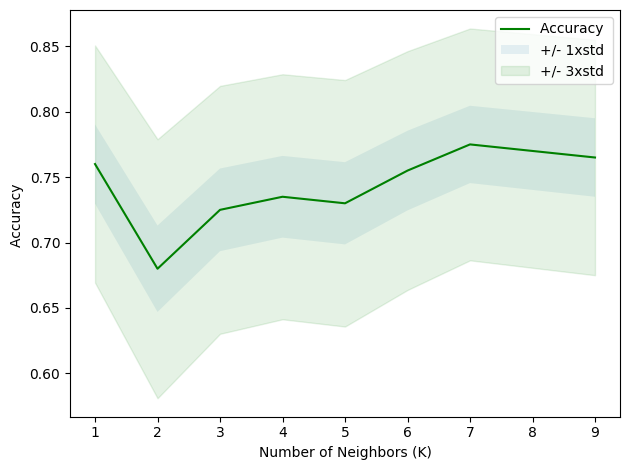

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best accuracy was with 0.775 with k = 7


#### **Decision Tree**
**Decision Trees** are built by splitting the training set into distinct nodes, where one node contains all of or most of one category of the data. Decision trees are about testing an attribute and branching the cases based on the result of the test where each internal node corresponds to a test and each branch corresponds to a result of the test and each leaf node assigns a patient to a class

In [2]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [5]:
# download data
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
df  = pd.read_csv(path, delimiter=",")
df[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [7]:
# Data size
df.shape
print('Rows: ', df.shape[0], ' Columns: ', df.shape[1])

Rows:  200  Columns:  6


In [8]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [10]:
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [12]:
# convert categorical data to numerical values using LabelEncoder
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
x[:,1] = le_sex.transform(x[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
x[:,2] = le_BP.transform(x[:,2])

le_chol = preprocessing.LabelEncoder()
le_chol.fit(['NORMAL', 'HIGH'])
x[:,3] = le_chol.transform(x[:,3])

x[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [13]:
y = df['Drug']
y[0:5]

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


In [17]:
# Setting up Decision Tree using train/test split
from sklearn.model_selection import train_test_split
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x,y, test_size=0.3, random_state=3)
print('Shape of X training set {}'.format(x_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))
print('Shape of X training set {}'.format(x_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (140, 5) &  Size of Y training set (140,)
Shape of X training set (140, 5) &  Size of Y training set (140,)


In [18]:
# Modeling
drugtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
drugtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
drugtree.fit(x_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
predtree = drugtree.predict(x_testset)

In [21]:
print(predtree[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [24]:
# Evaluation
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
print('DecisionTree Accuracy: ', metrics.accuracy_score(y_testset, predtree))

DecisionTree Accuracy:  0.9833333333333333


In [26]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found


<function matplotlib.pyplot.show(close=None, block=None)>

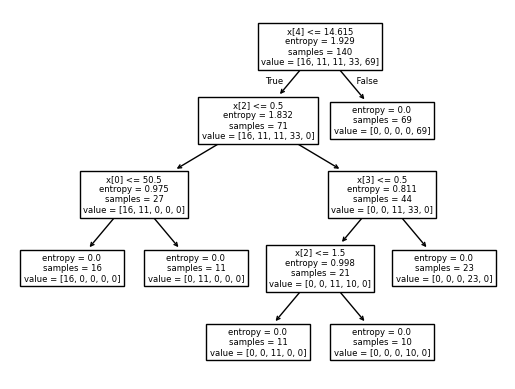

In [27]:
# Visualization
tree.plot_tree(drugtree)
plt.show

#### **Regression Trees**
**Regression Tree**  splits our data into groups based on features, like in classification, and return a prediction that is the average across the data.

The way the trees are built are similar to classification, but instead of using the entropy criterion. In Classification Trees, we choose features that increase the information gain. In Regression Trees, we choose features that minimize the error.

Regression Trees are implemented using DecisionTreeRegressor from sklearn.tree

In [37]:
from sklearn.tree import DecisionTreeRegressor
data =  pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/real_estate_data.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [29]:
data.shape

(506, 13)

In [30]:
data.isna().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [32]:
data.dropna(inplace=True)
data.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [33]:
X = data.drop(columns=["MEDV"])
Y = data["MEDV"]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21


In [34]:
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
5,28.7


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

In [45]:
reg_tree = DecisionTreeRegressor(criterion = 'squared_error')

In [46]:
# training
reg_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [47]:
# evaluation
reg_tree.score(X_test, Y_test)

0.8609626852302147

In [49]:
prediction = reg_tree.predict(X_test)

print("$",(prediction - Y_test).abs().mean()*1000)

$ 2631.6455696202534


In [51]:
regression_tree = DecisionTreeRegressor(criterion = "squared_error")

regression_tree.fit(X_train, Y_train)

print(regression_tree.score(X_test, Y_test))

prediction = regression_tree.predict(X_test)

print("$",(prediction - Y_test).abs().mean()*1000)

0.7479206661337494
$ 3018.9873417721524
